In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl


plt.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.linewidth'] = 2 
set_tex = lambda tex=True: plt.rcParams.update({"text.usetex": tex})
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12) 

In [10]:
from yahoo_fin import options
from datetime import timedelta, datetime

In [11]:
exp = options.get_expiration_dates('^SPX')

In [16]:
maturs = [datetime.strptime(x, '%B %d, %Y').date() for x in exp]

In [17]:
tt = [(y - datetime(2023, 5, 15).date()).days / 252. for y in dt]

In [18]:
tt

[0.1111111111111111,
 0.11507936507936507,
 0.11904761904761904,
 0.12301587301587301,
 0.12698412698412698,
 0.14285714285714285,
 0.14682539682539683,
 0.15079365079365079,
 0.15476190476190477,
 0.16666666666666666,
 0.17063492063492064,
 0.1746031746031746,
 0.17857142857142858,
 0.18253968253968253,
 0.19444444444444445,
 0.21031746031746032,
 0.2222222222222222,
 0.2261904761904762,
 0.23809523809523808,
 0.26587301587301587,
 0.29365079365079366,
 0.3055555555555556,
 0.376984126984127,
 0.42857142857142855,
 0.4880952380952381,
 0.5436507936507936,
 0.626984126984127,
 0.6706349206349206,
 0.7380952380952381,
 0.7896825396825397,
 0.8492063492063492,
 0.9047619047619048,
 0.9880952380952381,
 1.0992063492063493,
 1.2103174603174602,
 1.2619047619047619,
 1.3492063492063493,
 1.4603174603174602,
 1.5992063492063493,
 2.3214285714285716,
 3.765873015873016,
 4.126984126984127,
 5.2103174603174605,
 6.654761904761905]

In [40]:
mat = maturs[10]

In [41]:
def clean(calls):
    calls = calls[['Last Price', 'Strike', 'Implied Volatility', 'Ask', 'Bid']]
    calls.columns = ['price', 'strike', 'implied_vol', 'ask', 'bid']
    calls['implied_vol'] =   calls['implied_vol'].apply(lambda x: float(x.replace('%', '').replace(',',''))) / 100.
    return calls

In [42]:
calls = options.get_calls('^SPX', mat)
calls = clean(calls)

/var/folders/m1/_s3dpj6d7hq0y_999wt14gc00000gn/T/ipykernel_57164/2269839341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls['implied_vol'] =   calls['implied_vol'].apply(lambda x: float(x.replace('%', '').replace(',',''))) / 100.


In [43]:
puts = options.get_puts('^SPX', mat)

puts = clean(puts)

/var/folders/m1/_s3dpj6d7hq0y_999wt14gc00000gn/T/ipykernel_57164/2269839341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls['implied_vol'] =   calls['implied_vol'].apply(lambda x: float(x.replace('%', '').replace(',',''))) / 100.


In [38]:
puts

,call_price,strike,implied_vol,ask,bid
0,0.03,2000.0,2.3438,0.05,0.0
1,0.05,2200.0,2.0625,0.05,0.0
2,0.05,2400.0,1.8125,0.05,0.0
3,0.05,2600.0,1.5703,0.05,0.0
4,0.05,2800.0,1.3516,0.05,0.0
...,...,...,...,...,...
119,57.40,4375.0,0.0000,74.40,71.6
120,99.60,4400.0,0.0000,100.40,95.3
121,156.53,4450.0,0.0000,150.30,145.1
122,281.78,4500.0,0.0000,200.30,195.1


(4000.0, 4500.0)

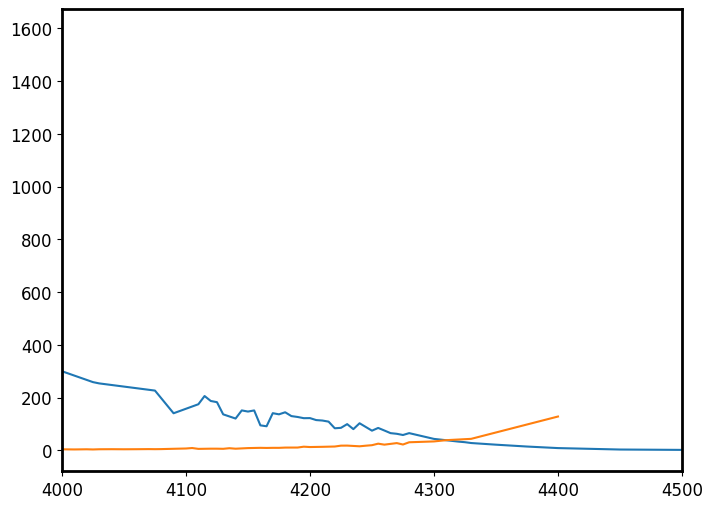

In [46]:
plt.plot(calls['strike'], calls['price'])
plt.plot(puts['strike'], puts['price'])
plt.xlim([4000, 4500])

In [47]:
from scipy.optimize import minimize, Bounds

In [51]:
k_minus = 4000.
k_plus = 4400.

In [55]:
calls_calib = calls.loc[(calls['strike'] >= k_minus) & (calls['strike'] <= k_plus), :]
puts_calib = puts.loc[(puts['strike'] >= k_minus) & (puts['strike'] <= k_plus), :]

In [59]:
calls_calib['strike'].values == puts_calib['strike'].values

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [61]:
df = calls.merge(puts, on='strike')

In [64]:
df.head()

,price_x,strike,implied_vol_x,ask_x,bid_x,price_y,implied_vol_y,ask_y,bid_y
0,1592.49,2600.0,1.1149,1707.9,1702.7,0.50,0.7090,0.20,0.00
1,793.22,3500.0,0.5519,810.6,805.5,0.64,0.3829,0.85,0.55
2,576.70,3650.0,0.4892,661.3,656.1,1.00,0.3250,1.15,0.80
3,453.14,3750.0,0.4284,561.8,556.6,1.43,0.2851,1.40,1.05
4,297.53,3900.0,0.3312,411.9,408.2,2.35,0.2270,2.10,1.70


In [67]:
def obj(x):
    out = (df['price_x'] - df['price_y'] - x[0] * (x[1] - df['strike'])).values
    return np.linalg.norm(out)**2

In [69]:
import pandas as pd

In [71]:
asofdate = pd.to_datetime('2023-06-11')
load_from = asofdate - timedelta(days=4 * 365)  # Use the past 4 years to initialize

In [72]:
import yfinance as yf

In [73]:
# Load data on SPX and VIX
spx = yf.Ticker("^GSPC").history(start=load_from, end=asofdate + timedelta(days=1))['Close']
spx.index = pd.to_datetime(spx.index.date)

In [75]:
spx[-1]

4298.85986328125

In [76]:
x_0 = np.array([.5, spx[-1]])

In [78]:
bounds = Bounds(np.full(2, 1e-7), np.array([1., np.inf]))

In [79]:
res = minimize(obj, x0 = x_0, method = 'L-BFGS-B', bounds=bounds)

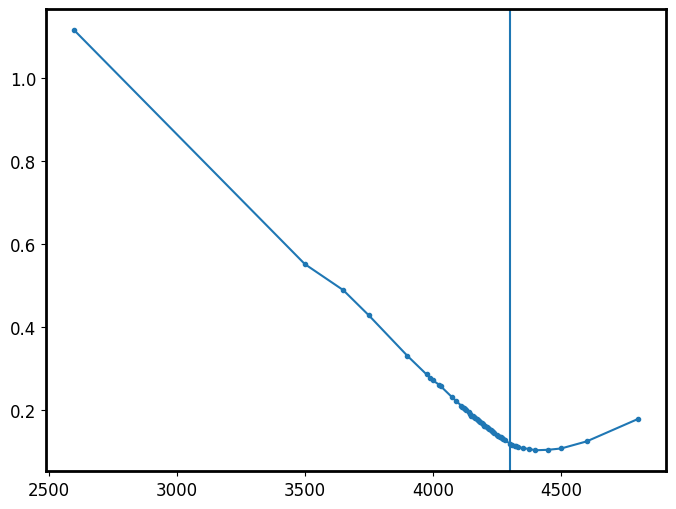

In [88]:
plt.plot(calls['strike'], calls['implied_vol'], '.-')
plt.axvline(x = res.x[-1])

In [91]:
np.random.seed(1)
rng = lambda n=1: np.random.randn(n)

In [93]:
dt = 1. / 252.

In [94]:
mdl_params = np.array([.08, -.13, .8, 12., 12.])

In [95]:
mdl_params[:3]

array([ 0.08, -0.13,  0.8 ])

In [149]:
def get_sample(x_init, mdl_params, matur, n_samples = 10_000):
    betas, lambds = mdl_params[:3], mdl_params[3:]
    sigma = lambda r_1, r_2: betas[0] + betas[1] * r_1 + betas[2] * np.sqrt(r_2)
    disc_steps = int(matur / dt)
    #spot = np.empty((n_samples, disc_steps + 1))
    spot = np.full(n_samples, x_init[0])
    r_1, r_2 = np.full(n_samples, x_init[1]), np.full(n_samples, x_init[2])

    for n in range(1, disc_steps + 1):
        z = rng(n_samples)
        sig_ = sigma(r_1, r_2)
        spot = spot * (1. + sig_ * np.sqrt(dt) * z)
        r_1 = r_1 * (1. - lambds[0] * dt) + lambds[0] * sig_ * np.sqrt(dt) * z
        r_2 = r_2 + lambds[1] * (sig_**2 - r_2) * dt
    return spot

In [187]:
spot_ = get_sample(np.array([spx[-1], 4e-2, 7e-3]), res_.x, matur = tt[10])

In [151]:
spot_

array([5253.23275313, 5866.54734428, 5635.10857576, ...,   57.04694772,
       5147.82267095, 1978.16820106])

In [121]:
def price_(samples, strikes, forward, disc_factor):
    return disc_factor * (np.maximum(np.subtract.outer(strikes, samples), .0).mean(axis = 1) + forward - strikes)

In [122]:
idx = int(tt[10] / dt)

In [188]:
prices = price_(spot_, calls['strike'].values, res.x[-1], res.x[0])

In [110]:
strikes = calls['strike'].values

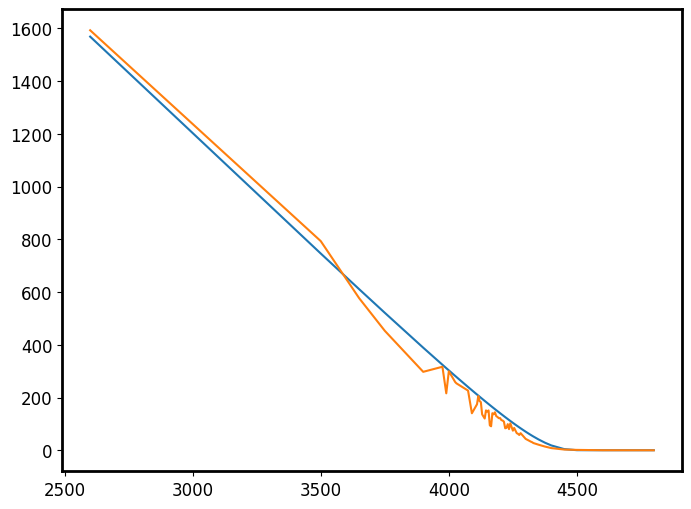

In [189]:
plt.plot(strikes, prices)
plt.plot(strikes, calls['price'])

In [136]:
# all inputs must be scalar
norm = stats.norm
def blackscholes_impv_scalar(K, T, F, value, df, callput='call', tol=1e-10, maxiter=1000):
    """Compute implied vol in Black-Scholes model
    
    Parameters
    ----------
    K: scalar
        The strike of the option.
    T: scalar
        The maturity of the option.
    S: scalar
        The spot price of the underlying security.
    value: scalar
        The value of the option
    callput: str
        Must be either 'call' or 'put'

    Returns
    -------
    vol: scalar
        The implied vol of the option.
    """
    if (K <= 0) or (T <= 0):
        return np.nan
    #F = S*np.exp((r-q)*T)
    K = K / F
    value = value / (F * df)
    callput = callput.lower()
    if callput not in ['call', 'put']:
        raise ValueError('The value of "callput" must be either "call" or "put"')
    opttype = 1 if callput == 'call' else -1
    value -= max(opttype * (1 - K), 0)
    if value < 0:
        return np.nan
    if (value == 0):
        return 0
    j = 1
    p = np.log(K)
    if K >= 1:
        x0 = np.sqrt(2 * p)
        x1 = x0 - (0.5 - K * norm.cdf(-x0) - value) * np.sqrt(2*np.pi)
        while (abs(x0 - x1) > tol*np.sqrt(T)) and (j < maxiter):
            x0 = x1
            d1 = -p/x1+0.5*x1
            x1 = x1 - (norm.cdf(d1) - K*norm.cdf(d1-x1)-value)*np.sqrt(2*np.pi)*np.exp(0.5*d1**2)
            j += 1
        return x1 / np.sqrt(T)
    else:
        x0 = np.sqrt(-2 * p)
        x1 = x0 - (0.5*K-norm.cdf(-x0)-value)*np.sqrt(2*np.pi)/K
        while (abs(x0-x1) > tol*np.sqrt(T)) and (j < maxiter):
            x0 = x1
            d1 = -p/x1+0.5*x1
            x1 = x1-(K*norm.cdf(x1-d1)-norm.cdf(-d1)-value)*np.sqrt(2*np.pi)*np.exp(0.5*d1**2)
            j += 1
        return x1 /np.sqrt(T)

# vectorized version
blackscholes_impv = np.vectorize(blackscholes_impv_scalar, excluded={'callput', 'tol', 'maxiter'})

# Example
# blackscholes_impv(K=95, T=0.25, S=100, value=7, callput='call')

In [145]:
r = - np.log(res.x[0]) / tt[0]

In [190]:
import py_vollib_vectorized
imp_ = py_vollib_vectorized.vectorized_implied_volatility_black(prices, res.x[-1], strikes, r, tt[10], 'c', return_as='numpy')  # equivalent

In [191]:
imp_

array([1.01602796, 0.44246203, 0.36705535, 0.32022433, 0.25552705,
       0.22599886, 0.22027291, 0.21649271, 0.20718357, 0.20534923,
       0.18906351, 0.18370636, 0.17664875, 0.17490072, 0.17316998,
       0.17144672, 0.16972705, 0.16629304, 0.16457202, 0.16285844,
       0.16115297, 0.15945429, 0.15776606, 0.15608908, 0.1544226 ,
       0.15275908, 0.15109573, 0.14942979, 0.14776811, 0.14610393,
       0.14444079, 0.14277998, 0.14112102, 0.13946106, 0.1378026 ,
       0.13614294, 0.13447626, 0.13281311, 0.12951313, 0.12787781,
       0.12623832, 0.1246052 , 0.12298137, 0.12135311, 0.11972742,
       0.11326094, 0.11002924, 0.10681079, 0.10520195, 0.10358668,
       0.09709731, 0.08895648, 0.08073347, 0.06400405, 0.05059198,
       0.06572609, 0.10125237])

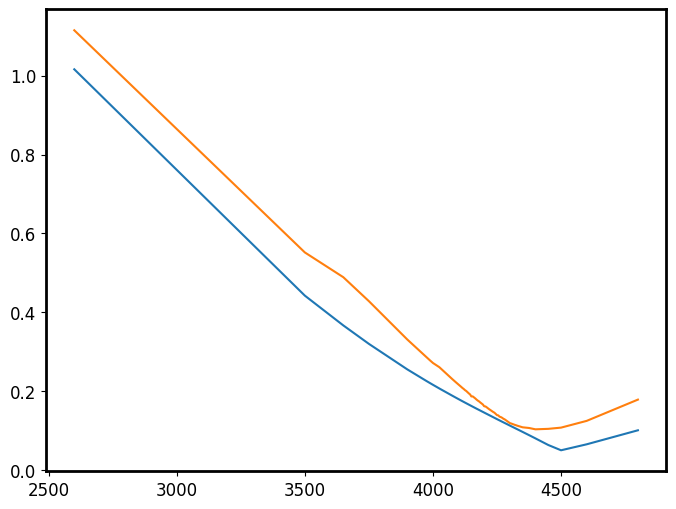

In [192]:
plt.plot(strikes, imp_)
plt.plot(strikes, calls['implied_vol'])


In [161]:
out = imp_ - calls['implied_vol'].values
out[~np.isnan(out)]

array([-0.10423983, -0.10256601, -0.1048546 , -0.0819228 , -0.03386167,
       -0.01058966, -0.00574515, -0.00271093,  0.00150254,  0.00324207,
        0.01909274,  0.02410383,  0.03062639,  0.0323771 ,  0.03372872,
        0.03558557,  0.03665222,  0.04051147,  0.04210469,  0.04600398,
        0.04470558,  0.04611533,  0.04763592,  0.04956643,  0.0510984 ,
        0.05213357,  0.05387123,  0.05530834,  0.05684438,  0.06018497,
        0.05953331,  0.06078745,  0.06234734,  0.06371257,  0.06488461,
        0.06616077,  0.06733904,  0.06821755,  0.07229828,  0.07199575,
        0.07430013,  0.07430578,  0.07511741,  0.07653329,  0.07715431,
        0.08258183,  0.08296894,  0.08346323,  0.08351298,  0.08375928,
        0.08387685,  0.08091774,  0.07971221,  0.06948663,  0.05730602,
        0.02144216])

In [162]:
def obj_calib(x, x_init, matur, strikes, forward, disc_factor, n_samples = 10_000):
    spot_= get_sample(x_init, x, matur, n_samples)
    prices = price_(spot_, strikes, forward, disc_factor)
    imp_ = py_vollib_vectorized.vectorized_implied_volatility_black(prices, res.x[-1], strikes, r, tt[10], 'c', return_as='numpy')
    out = calls['implied_vol'].values - imp_
    return np.linalg.norm(out[~np.isnan(out)])**2

In [154]:
x_init = np.array([spx[-1], 4e-2, 7e-3])
forward, disc_factor = res.x[-1], res.x[0]
matur = tt[10]

In [170]:
x0_ = np.array([0.1, -0.3, .5, 15., 15.])
lower = np.array([1e-7, -np.inf, 1e-7, 1e-7, 1e-7])
upper = np.array([np.inf, 0., 1., np.inf, np.inf])
obj = lambda x: obj_calib(x, x_init, tt[10], strikes, forward, disc_factor)

In [182]:
res_ = minimize(obj, x0 = x0_, method = 'L-BFGS-B', bounds = Bounds(lower, upper), options = {'gtol': 1e-5, 'maxiter': 100, 'eps': .1})

/opt/homebrew/lib/python3.10/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [55, 56]
  below_intrinsic, above_max_price = _check_below_and_above_intrinsic(K, F, flag, undiscounted_option_price, on_error)
/opt/homebrew/lib/python3.10/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [54, 55, 56]
  below_intrinsic, above_max_price = _check_below_and_above_intrinsic(K, F, flag, undiscounted_option_price, on_error)
/opt/homebrew/lib/python3.10/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [53, 54, 55, 56]
  below_intrinsic, above_max_price = _check_below_and_above_intrinsic(K, F, flag, undiscounted_option_price, on_error)
/opt/homebrew/lib/python3.10/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [56]
  below_intrinsic, abov

In [186]:
res_

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.07535215221558135
        x: [ 7.770e-02 -2.948e-01  3.885e-01  1.504e+01  1.503e+01]
      nit: 3
      jac: [ 5.248e+00  5.655e-01 -2.439e-01 -1.262e-01 -8.898e-02]
     nfev: 78
     njev: 13
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>

In [193]:
def get_samples(x_init, mdl_params, matur, n_samples = 10_000):
    betas, lambds = mdl_params[:3], mdl_params[3:]
    sigma = lambda r_1, r_2: betas[0] + betas[1] * r_1 + betas[2] * np.sqrt(r_2)
    disc_steps = int(matur / dt)
    spot = np.empty((n_samples, disc_steps + 1))
    spot[:, 0] = x_init[0]
    r_1, r_2 = np.full(n_samples, x_init[1]), np.full(n_samples, x_init[2])

    for n in range(1, disc_steps + 1):
        z = rng(n_samples)
        sig_ = sigma(r_1, r_2)
        spot[:, n] = spot[:, n - 1] * (1. + sig_ * np.sqrt(dt) * z)
        r_1 = r_1 * (1. - lambds[0] * dt) + lambds[0] * sig_ * np.sqrt(dt) * z
        r_2 = r_2 + lambds[1] * (sig_**2 - r_2) * dt
    return spot

In [194]:
spot_ = get_samples(x_init, mdl_params, 5.)

In [198]:
t_grid = np.arange(0., 5. + dt, dt)

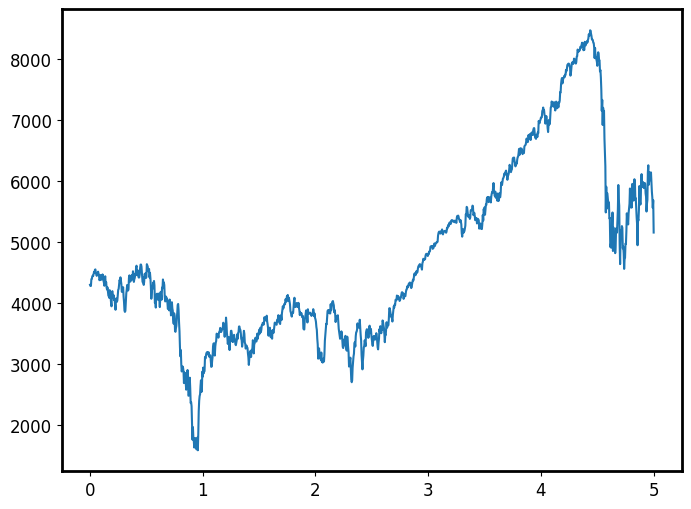

In [199]:
plt.plot(t_grid, spot_[0, :])

In [215]:
begin_date = int(.5 / dt)
end_date = int(5. * (1 / dt + 1))
period_idx = np.arange(begin_date, end_date, begin_date)

In [216]:
recall_dates = t_grid[period_idx]

In [218]:
samples_autocall = spot_[:, period_idx]

In [225]:
s_0 = spx[-1]

In [304]:
def autocall_price(x_0, x, barriers, coupons, strike):
    condit_up = 1 * (x / x_0 >= barriers)
    condit_down = np.cumprod(1 * (x / x_0 < barriers), axis = 1)
    condit_down = np.insert(condit_down, 0, values = 1., axis = 1)
    payoff = np.sum(coupons * x * condit_up * condit_down[:, :-1], axis = 1)
    payoff += - np.maximum(x[:, -1] - strike, 0.)  *  condit_down[:, -1]
    return payoff.mean()

In [299]:
coupons = np.linspace(0.05, 1., 10)

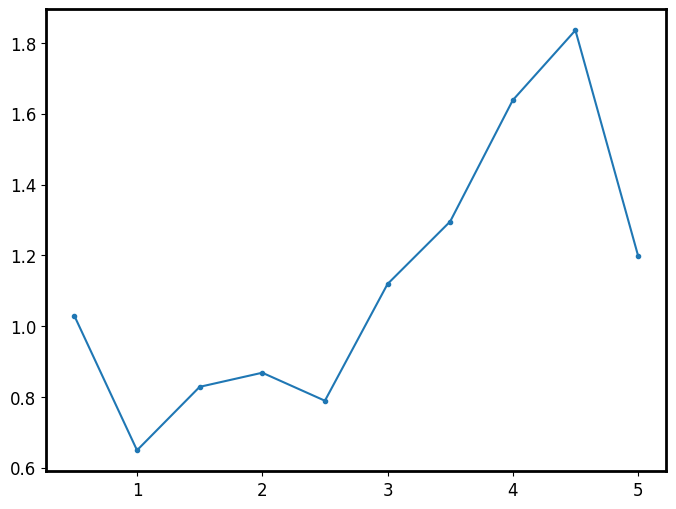

In [300]:
plt.plot(recall_dates, samples_autocall[0, :] / s_0, '.-')

In [305]:
autocall_price(s_0, samples_autocall, np.full_like(recall_dates, 2.), coupons, 1.)

-895.1606381271874